In [1]:
import numpy as np
import os
import re
import pandas as pd
import random
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
from matplotlib.pyplot import MultipleLocator

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

with open("sys",'r') as f:
    sys=f.read()

In [2]:
ft = 60 # font size
lw = 8 # line width
ms = 25 # marker size
color = ['darkred','darkblue','darkgreen','darkorange','darkviolet']
marker = ["o", "v", "s", "^", "D", "o"]

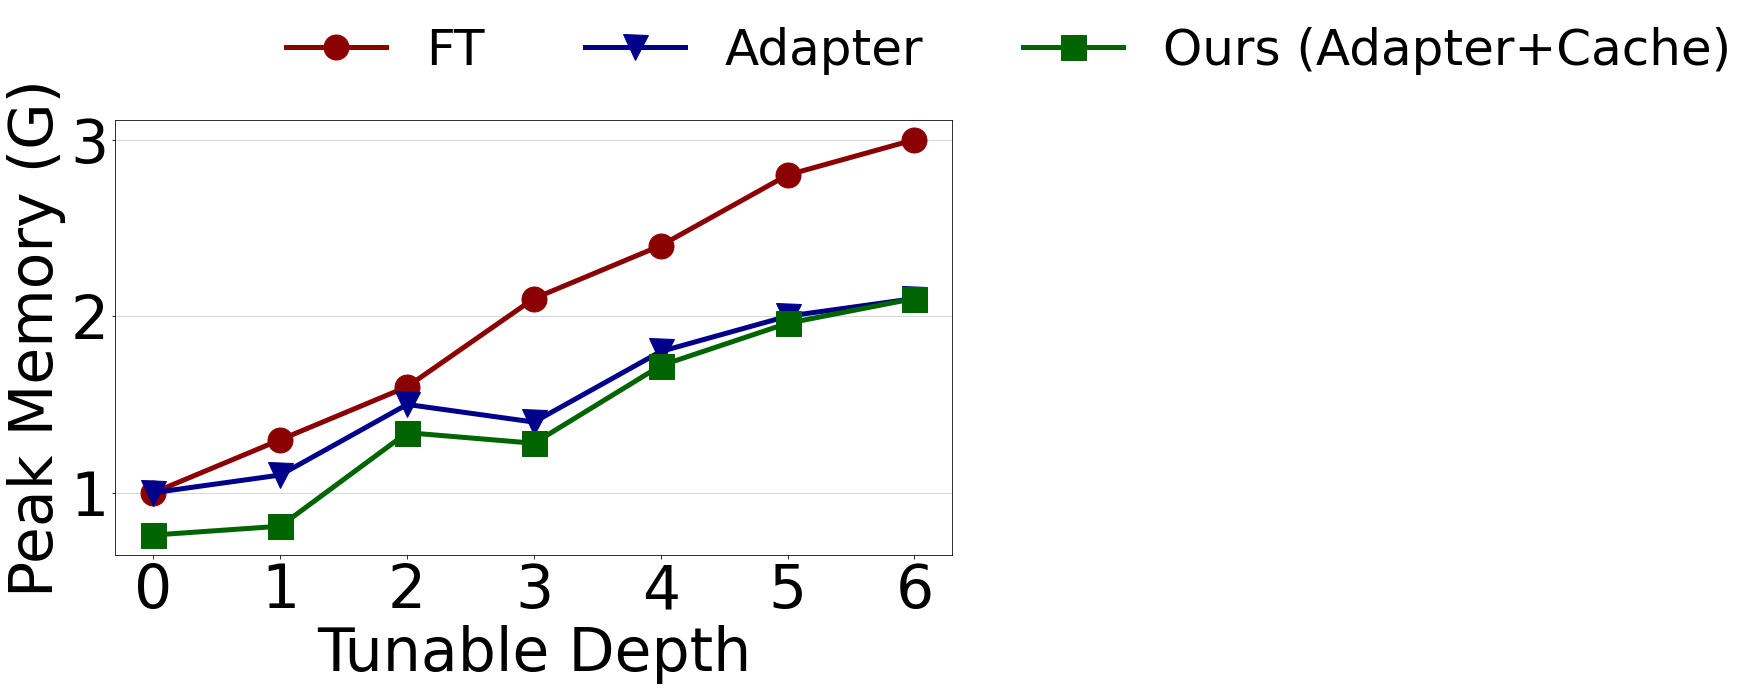

In [3]:
plt.figure(figsize=(15,8))
# 设置刻度字体大小
# plt.title("DistilBERT",fontsize=ft)
# 设置刻度字体大小
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlabel("Tunable Depth", fontsize=ft)
plt.ylabel("Peak Memory (G)", fontsize=ft)
plt.grid(color = 'k', axis="y", linewidth = 0.5, alpha=0.3)

x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

memory_distilbert = [
    [1.0, 1.3, 1.6, 2.1, 2.4, 2.8, 3.0], # Vanilla BERT Freeze
    [1.0, 1.1, 1.5, 1.4, 1.8, 2.0, 2.1], # Vanilla Adapter
    [0.76, 0.81, 1.34, 1.28, 1.72, 1.96, 2.1]  # Vanilla Adapter + Cache
]

memory_bert = [
    [1.2, 1.5, 1.7, 2.0, 2.3, 2.8, 3.2, 3.5, 3.9, 4.1, 4.3, 4.7, 5.3], # Vanilla BERT Freeze
    [1.2, 1.3, 1.3, 1.6, 1.8, 2.1, 2.4, 2.5, 2.7, 3.1, 3.3, 3.5, 3.8], # Vanilla Adapter
    [0.72, 0.86, 0.9, 1.24, 1.48, 1.80, 2.16, 2.3, 2.54, 2.98, 3.22, 3.46, 3.8]  # Vanilla Adapter + Cache
]

x = list(range(7))

type = ["FT", "Adapter", sys + " (Adapter+Cache)"]
for i in range(3):
    plt.plot(x, memory_distilbert[i], linewidth = 5, color=color[i], marker=marker[i], markersize = ms, label=type[i])

plt.legend(fontsize=50,ncol = 3,frameon=False,loc="lower left", bbox_to_anchor=(0.15, 1),)
plt.savefig('../figs/eval-cost-memory-distilbert.pdf', bbox_inches="tight")

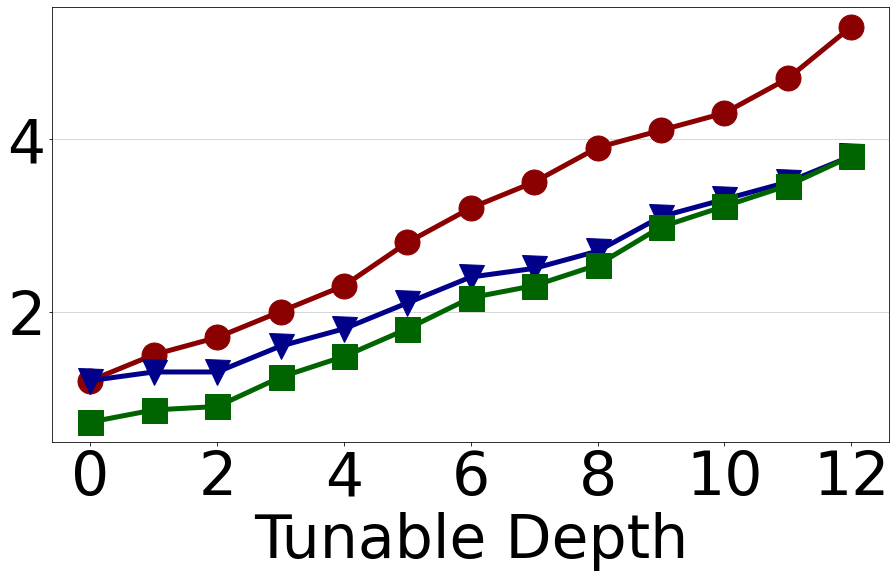

In [4]:
plt.figure(figsize=(15,8))
# 设置刻度字体大小
# plt.title("BERT",fontsize=ft)
# 设置刻度字体大小
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlabel("Tunable Depth", fontsize=ft)
# plt.ylabel("Peak Memory (G)", fontsize=ft)
plt.grid(color = 'k', axis="y", linewidth = 0.5, alpha=0.3)

x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

memory_distilbert = [
    [1.0, 1.3, 1.6, 2.1, 2.4, 2.8, 3.0], # Vanilla BERT Freeze
    [1.0, 1.1, 1.5, 1.4, 1.8, 2.0, 2.1], # Vanilla Adapter
    [0.76, 0.81, 1.34, 1.28, 1.72, 1.96, 2.1]  # Vanilla Adapter + Cache
]

memory_bert = [
    [1.2, 1.5, 1.7, 2.0, 2.3, 2.8, 3.2, 3.5, 3.9, 4.1, 4.3, 4.7, 5.3], # Vanilla BERT Freeze
    [1.2, 1.3, 1.3, 1.6, 1.8, 2.1, 2.4, 2.5, 2.7, 3.1, 3.3, 3.5, 3.8], # Vanilla Adapter
    [0.72, 0.86, 0.9, 1.24, 1.48, 1.80, 2.16, 2.3, 2.54, 2.98, 3.22, 3.46, 3.8]  # Vanilla Adapter + Cache
]

x = list(range(13))

type = ["BERT", "Adapter", "Adapter+Cache"]
for i in range(3):
    plt.plot(x, memory_bert[i], linewidth = 5, color=color[i], marker=marker[i], markersize = ms, label=type[i])

# plt.legend(fontsize=38,ncol = 1,frameon=False)
plt.savefig('../figs/eval-cost-memory-bert.pdf', bbox_inches="tight")